- X1	Relative Compactness
- X2	Surface Area
- X3	Wall Area
- X4	Roof Area
- X5	Overall Height
- X6	Orientation
- X7	Glazing Area
- X8	Glazing Area Distribution
- y1	Heating Load
- y2	Cooling Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('ENB2012_data.csv')

In [3]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
data.columns= ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", 
               "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]

In [5]:
data.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [6]:
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [7]:
data.shape

(768, 10)

In [8]:
pd.isnull(data).sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

## Adding column for overall load

In [9]:
data['Overall Load'] = data['Heating Load'] + data['Cooling Load']
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Overall Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12


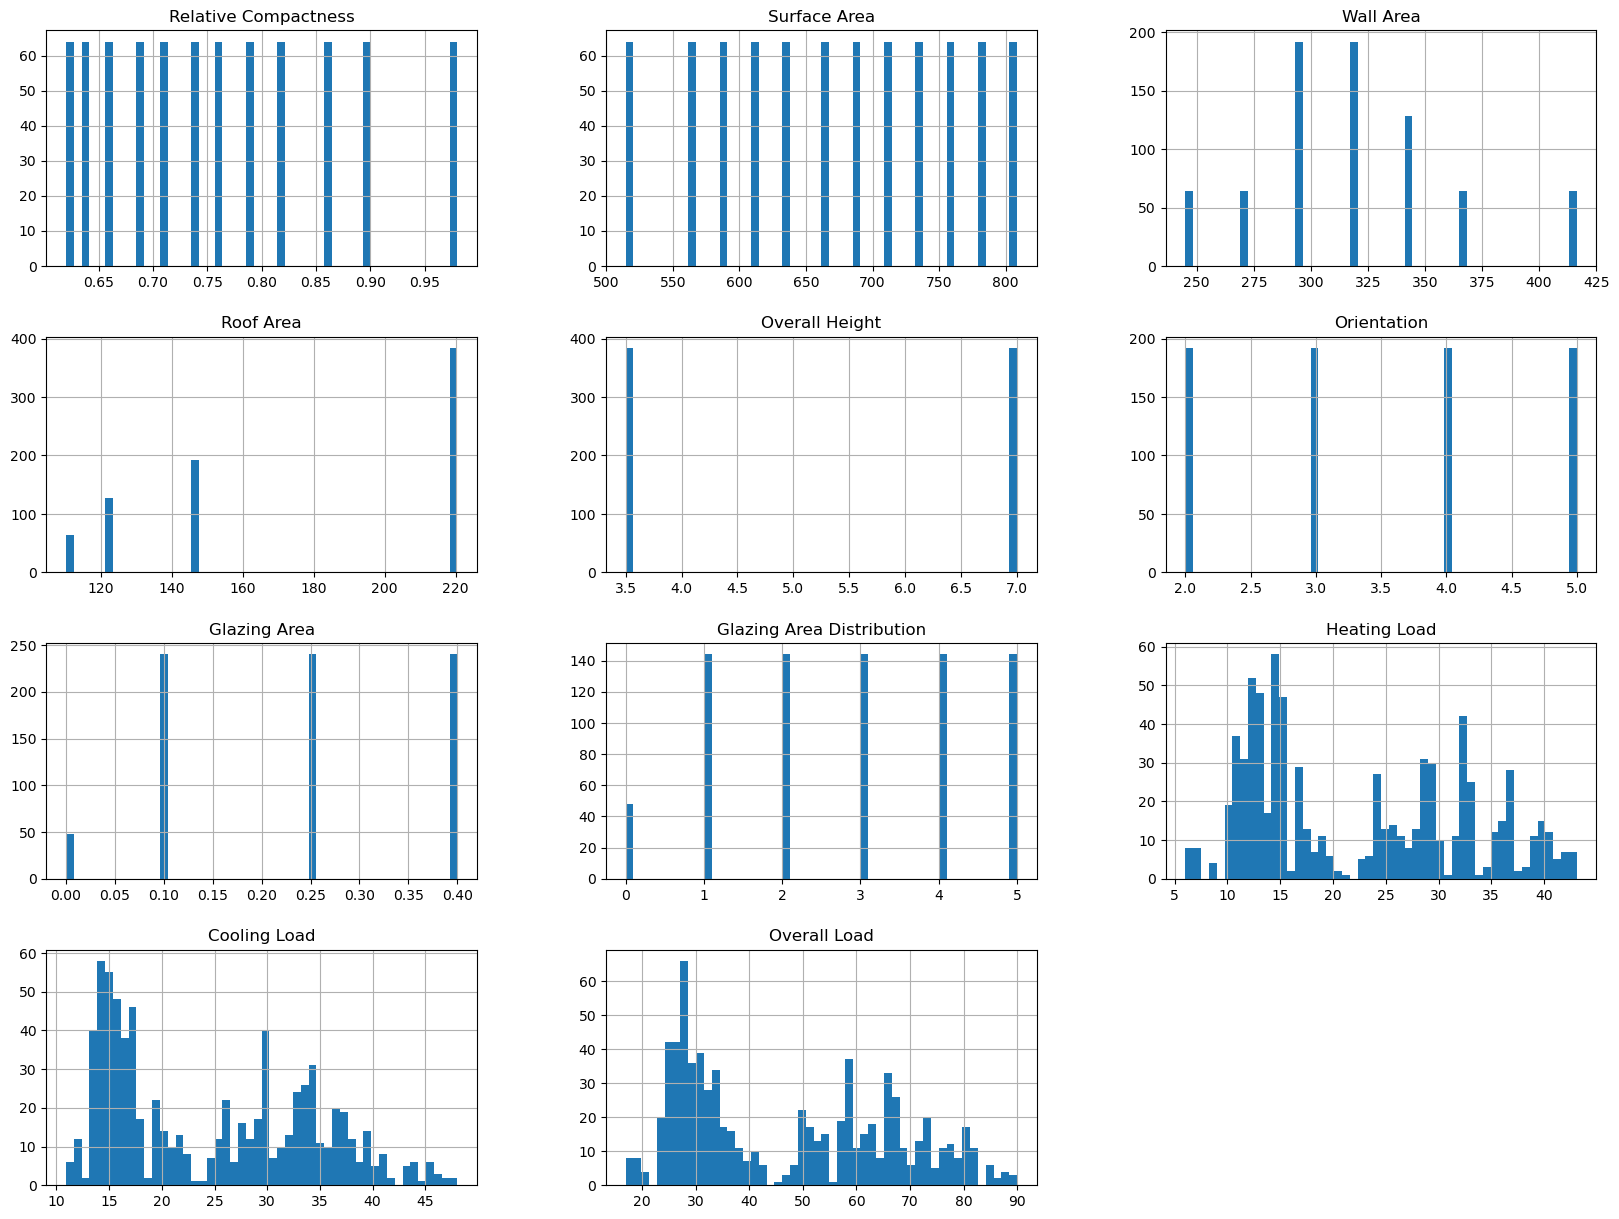

In [10]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
data.corr()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Overall Load
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339,0.631950
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999,-0.669389
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117,0.444502
Roof Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547,-0.867423
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785,0.897945
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290,0.005637
Glazing Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505,0.241048
Glazing Area Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525,0.069911
Heating Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862,0.994299
Cooling Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000,0.993585


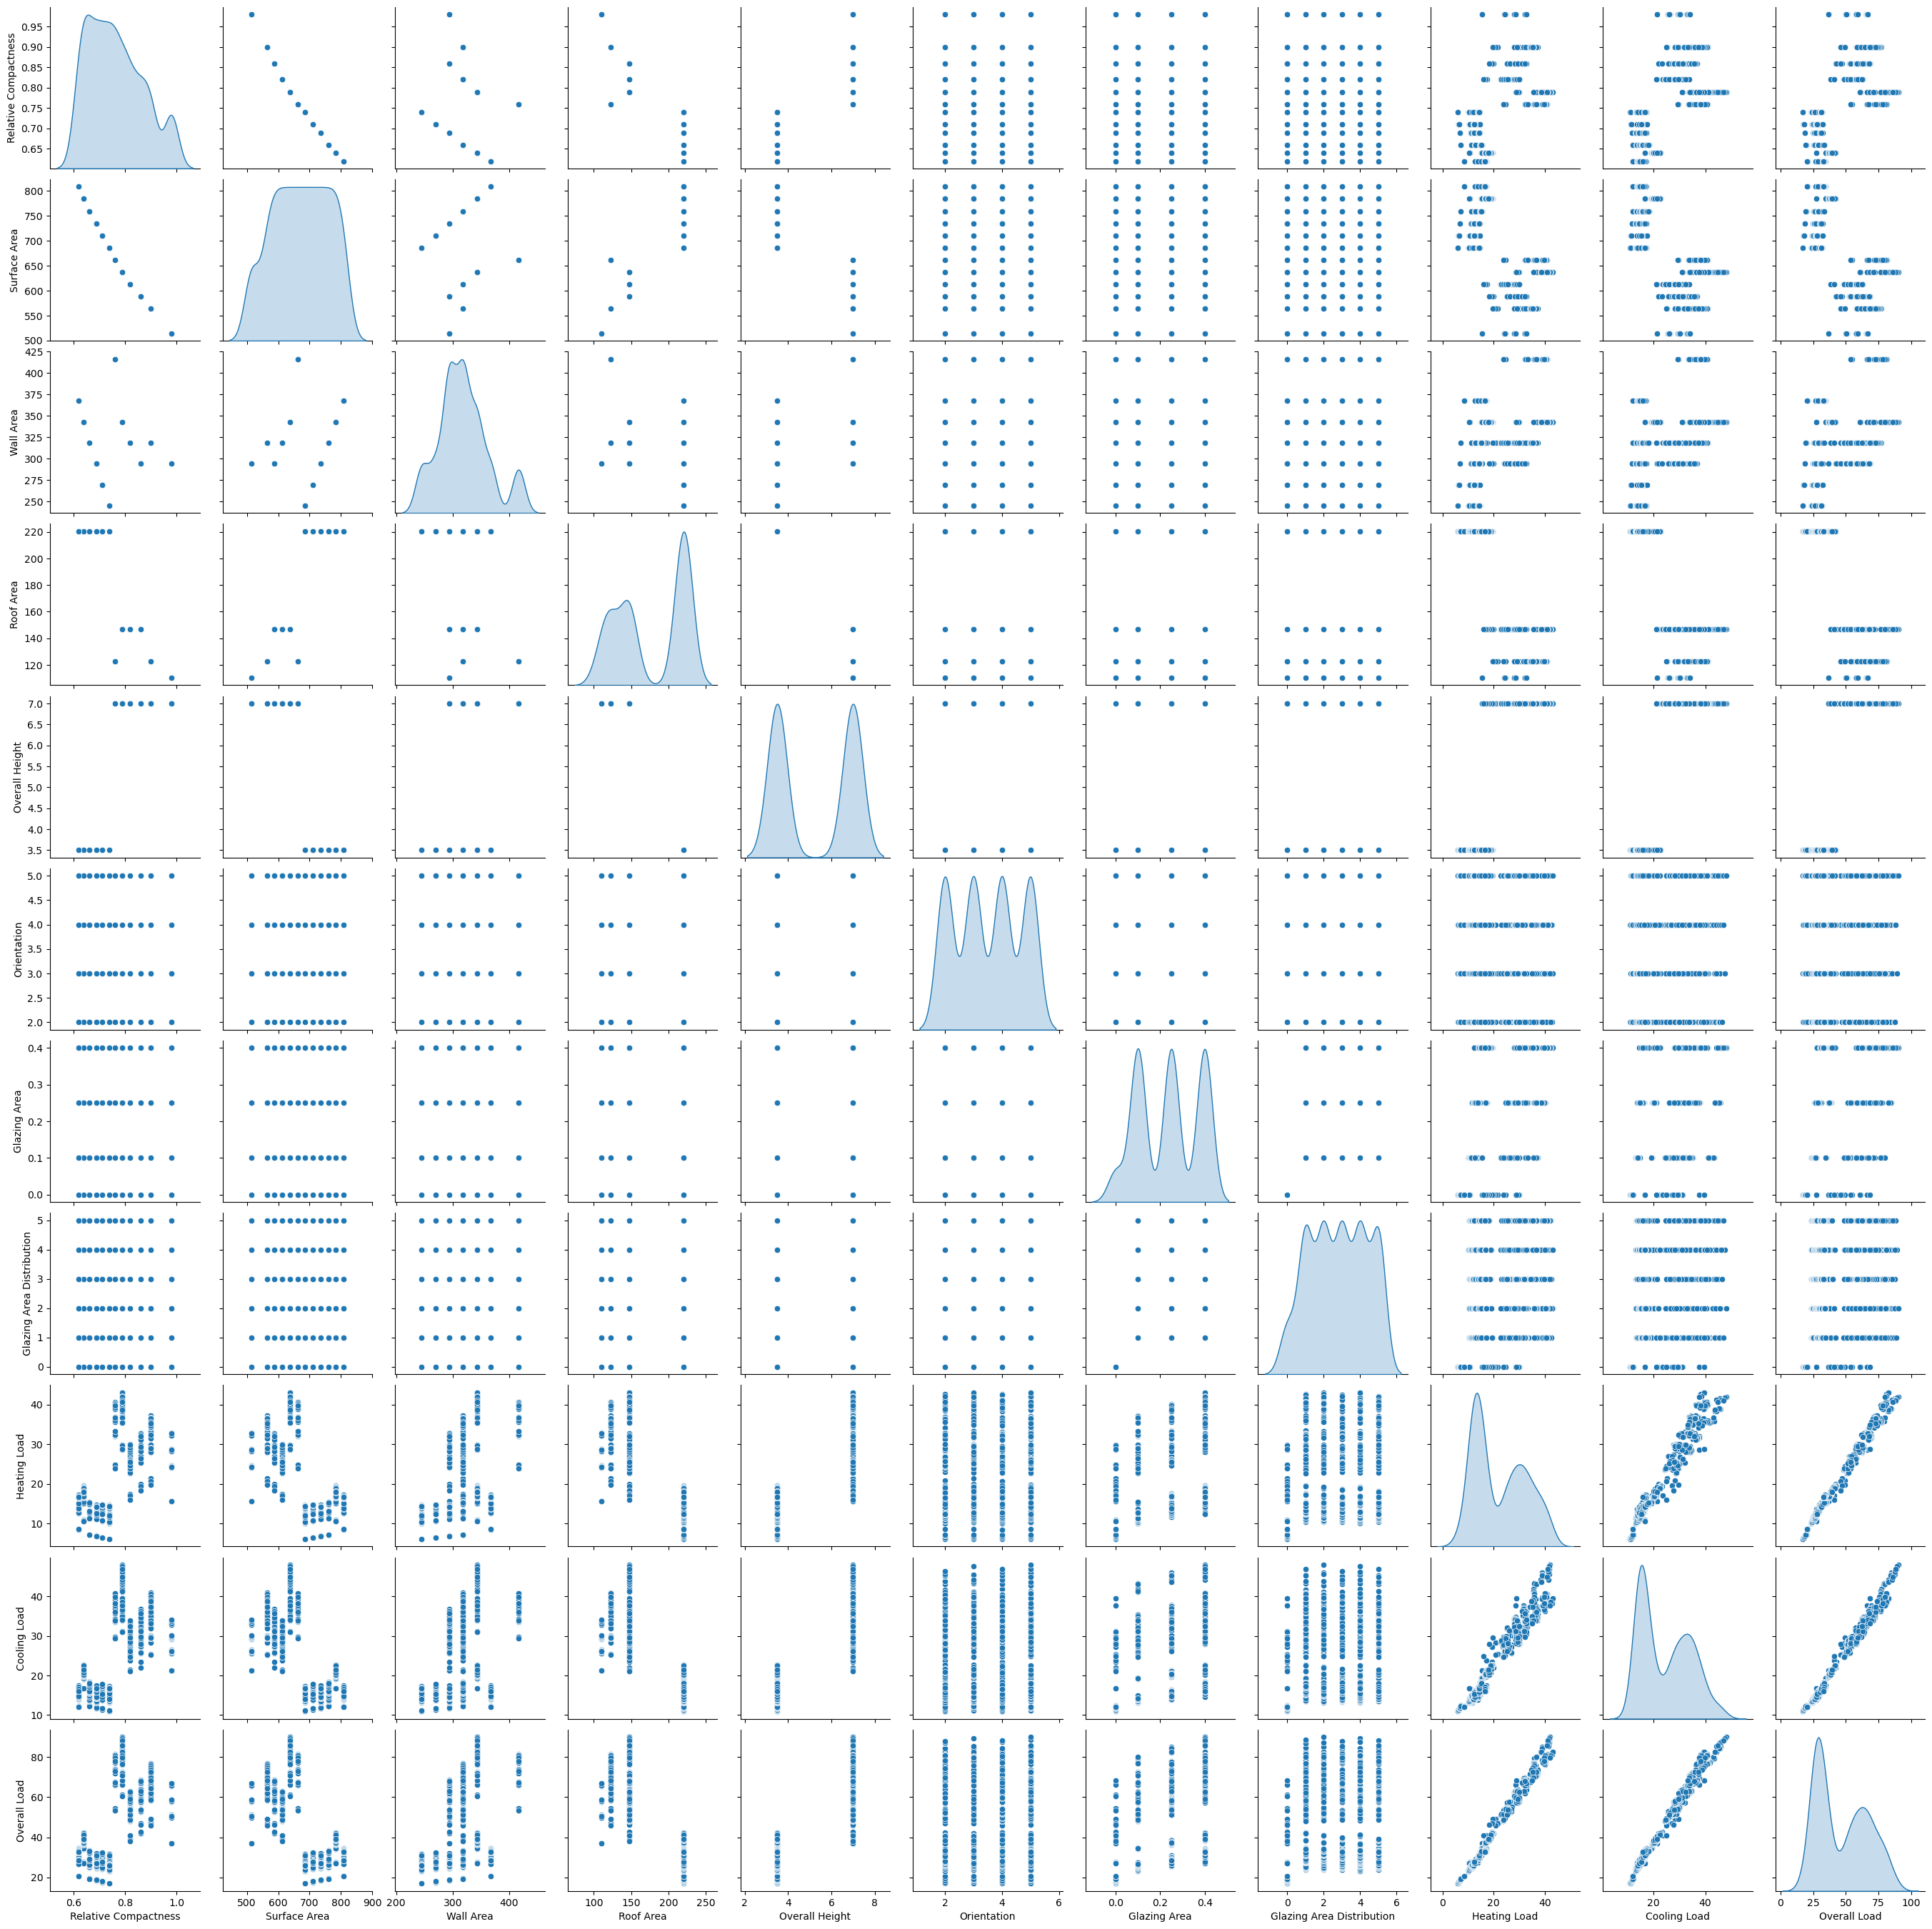

In [12]:
sns.pairplot(data, kind="scatter", diag_kind='kde')

<Axes: >

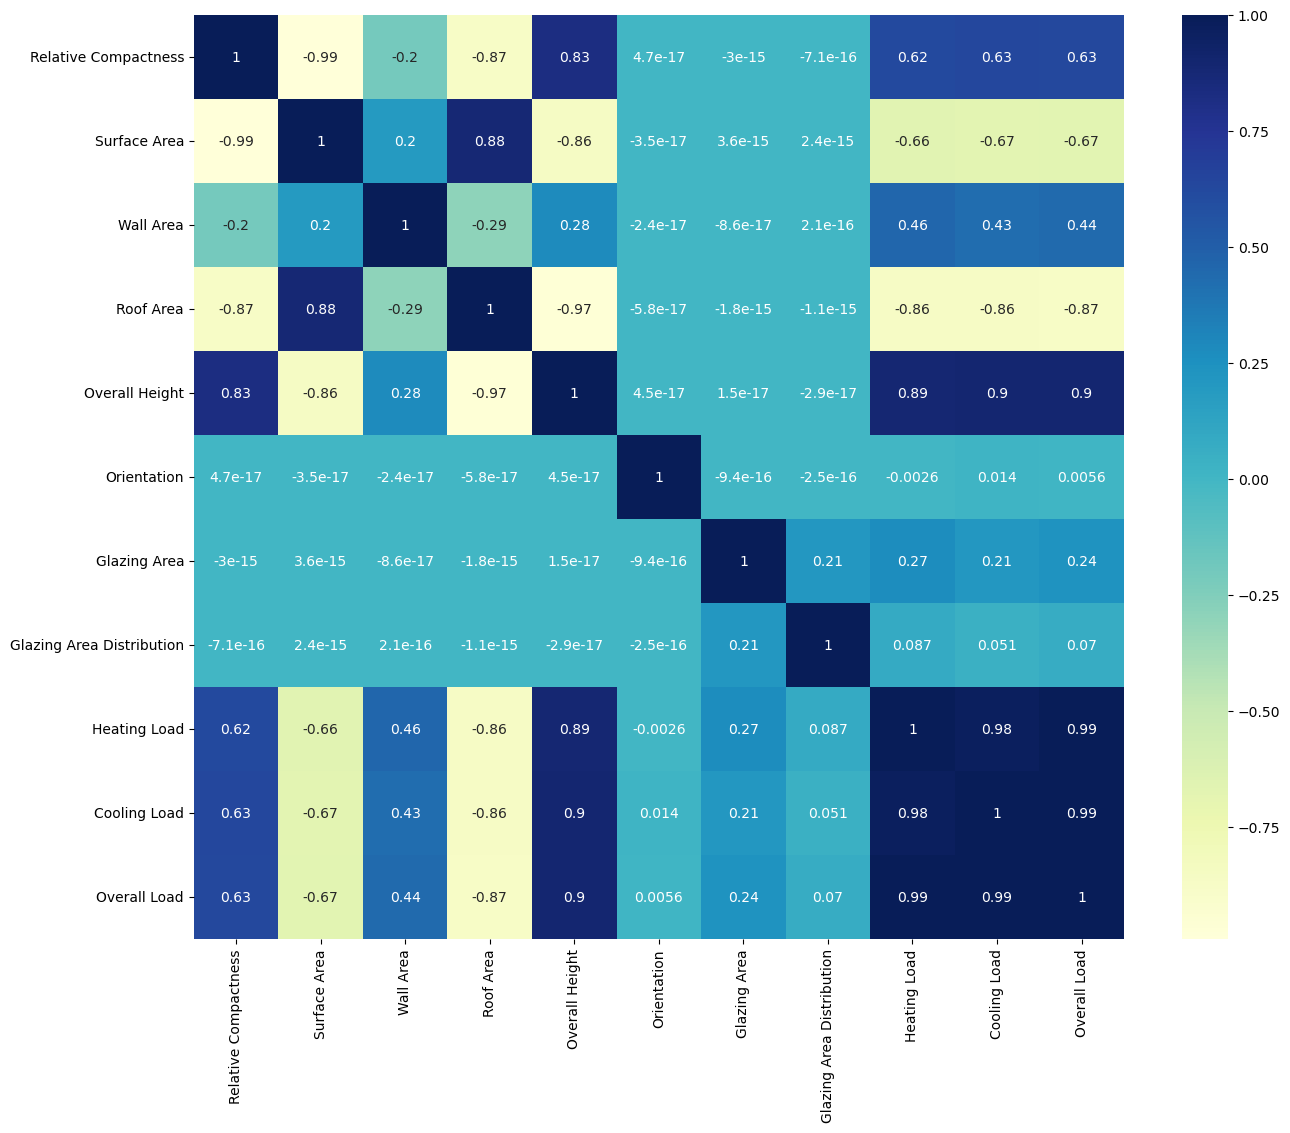

In [13]:
plt.subplots(figsize=(15,12))
corr = data.corr()
sns.heatmap(corr, annot=True,cmap="YlGnBu")

## Trend of overall load

<Axes: xlabel='Overall Load', ylabel='Density'>

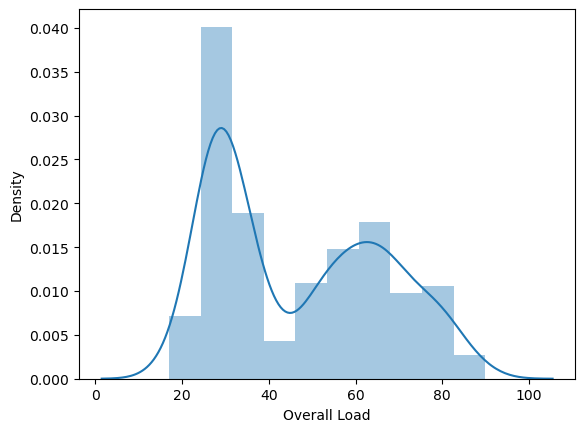

In [14]:
sns.distplot(data['Overall Load'])

{'whiskers': [<matplotlib.lines.Line2D at 0x198dc012e90>,
 'caps': [<matplotlib.lines.Line2D at 0x198dc01c250>,
 'boxes': [<matplotlib.lines.Line2D at 0x198dc0125d0>],
 'medians': [<matplotlib.lines.Line2D at 0x198dc01d310>],
 'fliers': [<matplotlib.lines.Line2D at 0x198dc01dbd0>],
 'means': []}

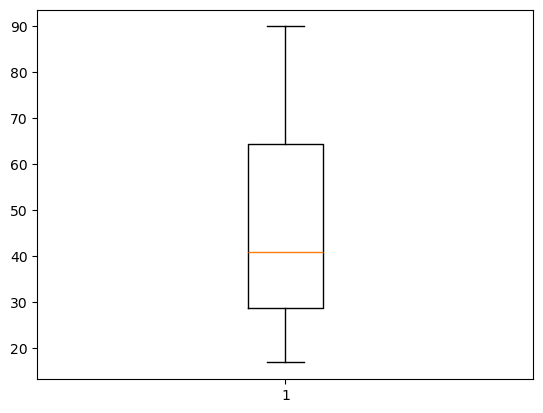

In [15]:
plt.boxplot(data['Overall Load'])

In [16]:
data['Overall Load'].quantile([.25, .50, 0.75])

0.25    28.750
0.50    40.970
0.75    64.335
Name: Overall Load, dtype: float64

## Adding column for classes for efficiency

In [17]:
data['Efficiency'] = np.where(data['Overall Load']<29, 'Low', np.where(data['Overall Load']<64, 'Average', 'High'))
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Overall Load,Efficiency
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88,Average
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88,Average
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88,Average
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88,Average
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12,Average


In [18]:
data.shape

(768, 12)

In [19]:
data['Efficiency'].value_counts()

Average    368
Low        207
High       193
Name: Efficiency, dtype: int64

<Axes: xlabel='Efficiency', ylabel='count'>

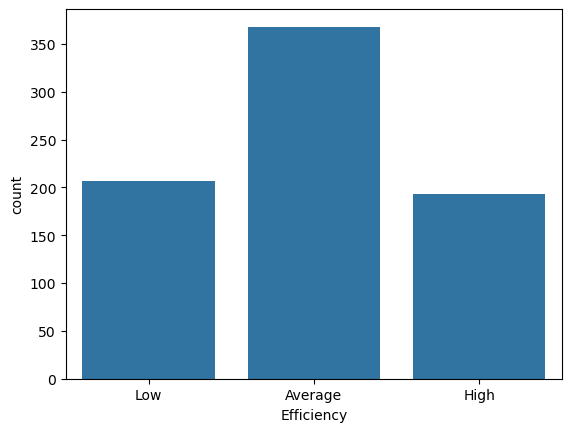

In [20]:
sns.countplot(x='Efficiency', data=data, order=['Low','Average','High'])

# Creating different datasets for different Y variables

## Data set for heating load

In [21]:
data_heat = data.drop(columns=['Cooling Load','Overall Load','Efficiency'])

In [22]:
data_heat.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


## Data set for cooling load

In [23]:
data_cool = data.drop(columns=['Heating Load','Overall Load','Efficiency'])
data_cool.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


In [24]:
data_cool.shape

(768, 9)

## Data set for efficiency classification

In [25]:
data_eff = data.drop(columns=['Cooling Load','Heating Load','Overall Load'])
data_eff.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Efficiency
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,Average
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,Average
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,Average
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,Average
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,Average


# Models for predicting heating load

## Data preprocessing

In [26]:
X = data_heat.drop(columns=['Heating Load'])
y= data_heat['Heating Load']

In [27]:
y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Heating Load, dtype: float64

In [28]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Manual Model

In [29]:
# Add bias term for manual implementation
def add_bias(X):
    return np.c_[np.ones(X.shape[0]), X]

X_train_bias = add_bias(X_train)
X_test_bias = add_bias(X_test)


In [30]:
# Manual Linear Regression Implementation
class LinearRegressionScratch:
    def __init__(self):
        self.weights = None

    def fit(self, X, y, learning_rate=0.01, epochs=1000):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for epoch in range(epochs):
            predictions = np.dot(X, self.weights)
            errors = predictions - y
            gradients = (2 / n_samples) * np.dot(X.T, errors)
            self.weights -= learning_rate * gradients

    def predict(self, X):
        return np.dot(X, self.weights)


In [31]:
# Train manual linear regression model
manual_model = LinearRegressionScratch()
manual_model.fit(X_train_bias, y_train, learning_rate=0.1, epochs=1000)


In [32]:
# Predictions using manual model
y_pred_manual = manual_model.predict(X_test_bias)


## Sklearn models

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [35]:
# Train sklearn models
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

###  Evaluate models

In [36]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

manual_metrics = evaluate_model(y_test, y_pred_manual)
lr_metrics = evaluate_model(y_test, y_pred_lr)
ridge_metrics = evaluate_model(y_test, y_pred_ridge)
lasso_metrics = evaluate_model(y_test, y_pred_lasso)


In [37]:
# Print evaluation metrics
print("Manual Model Metrics:", manual_metrics)
print("Linear Regression Metrics:", lr_metrics)
print("Ridge Regression Metrics:", ridge_metrics)
print("Lasso Regression Metrics:", lasso_metrics)


Manual Model Metrics: (9.410942574829571, 3.0677259614948613, 0.9104657260432152)
Linear Regression Metrics: (9.174240315755208, 3.028900842839727, 0.9127176752758921)
Ridge Regression Metrics: (9.261506633707173, 3.043272356150066, 0.9118874368213925)
Lasso Regression Metrics: (9.840015227784958, 3.1368798554909554, 0.9063835941896194)


##  Plot actual vs predicted values for Manual Model

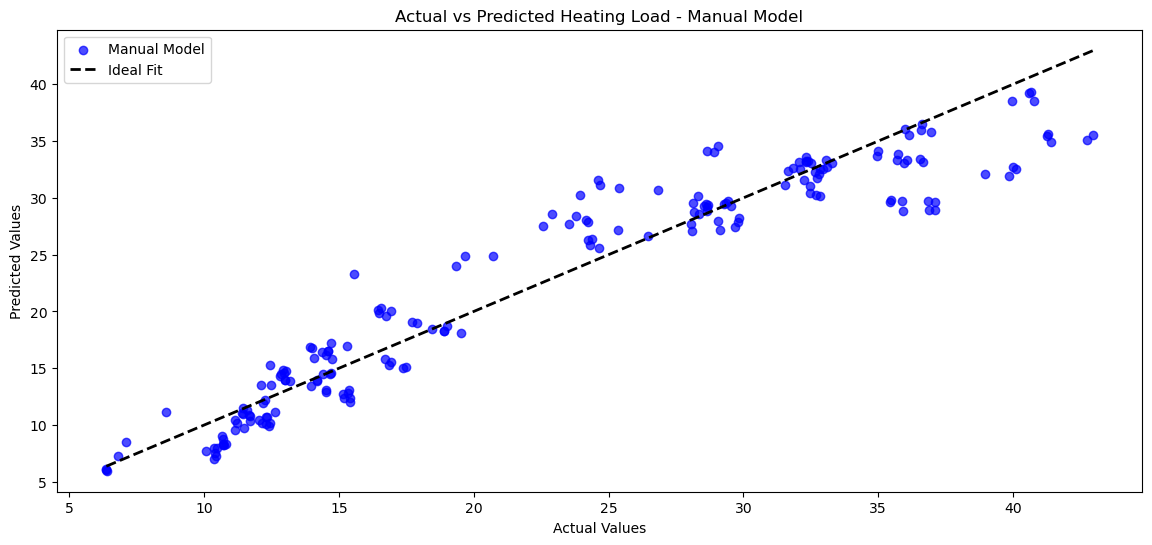

In [39]:
plt.figure(figsize=(14, 6))
plt.scatter(y_test, y_pred_manual, label='Manual Model', alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Heating Load - Manual Model")
plt.legend()
plt.show()

## Plot actual vs predicted values for Linear Regression

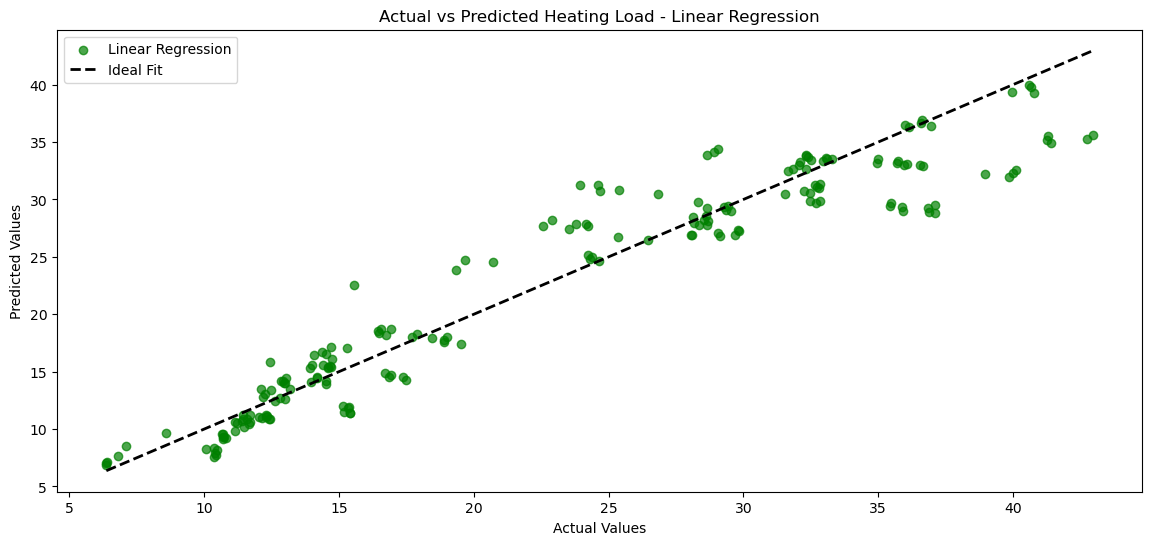

In [40]:
plt.figure(figsize=(14, 6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Heating Load - Linear Regression")
plt.legend()
plt.show()

## Plot actual vs predicted values for Ridge Regression

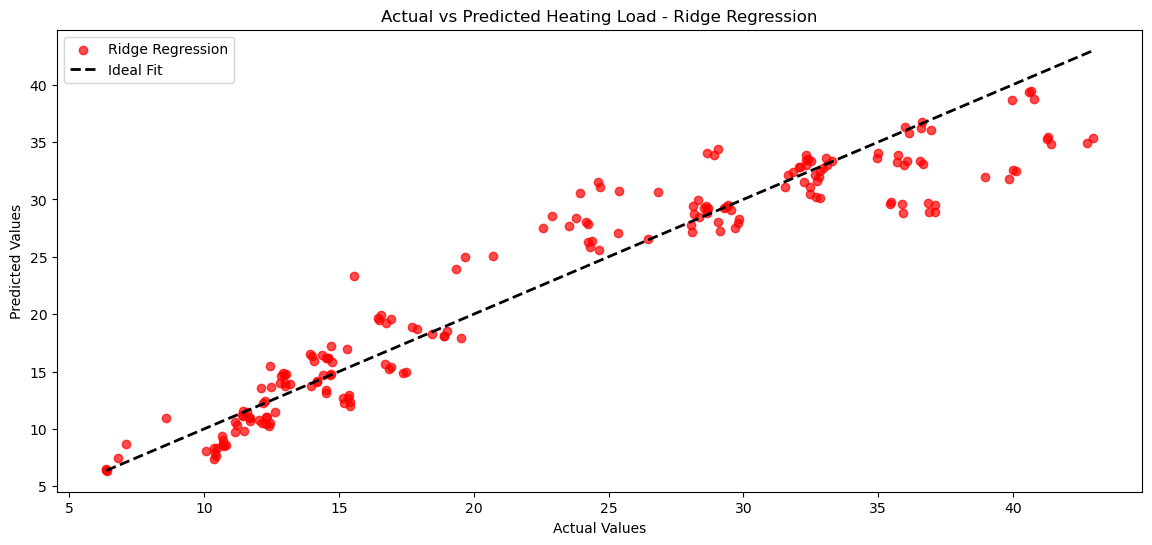

In [41]:
plt.figure(figsize=(14, 6))
plt.scatter(y_test, y_pred_ridge, label='Ridge Regression', alpha=0.7, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Heating Load - Ridge Regression")
plt.legend()
plt.show()


## Plot actual vs predicted values for Lasso Regression

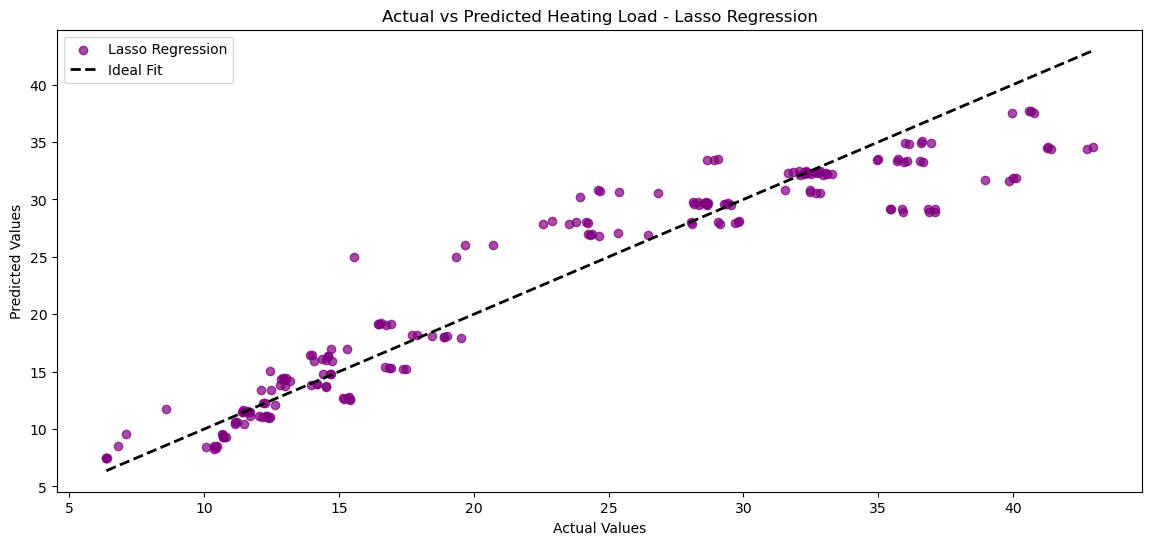

In [42]:

plt.figure(figsize=(14, 6))
plt.scatter(y_test, y_pred_lasso, label='Lasso Regression', alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Heating Load - Lasso Regression")
plt.legend()
plt.show()

## Feature importance from sklearn model

In [44]:
# Feature importance from sklearn model
feature_importance = pd.DataFrame({
    'Feature': [f'Feature {i+1}' for i in range(len(lr_model.coef_))],  # Generate feature names dynamically
    'Coefficient': lr_model.coef_
})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("Feature Importance:")
print(feature_importance)


Feature Importance:
     Feature   Coefficient
1  Feature 2  1.139458e+15
4  Feature 5  1.375000e+01
6  Feature 7  8.204102e+00
7  Feature 8  7.895508e-01
5  Feature 6  2.749023e-01
0  Feature 1 -2.549774e+01
2  Feature 3 -6.646837e+14
3  Feature 4 -8.545933e+14


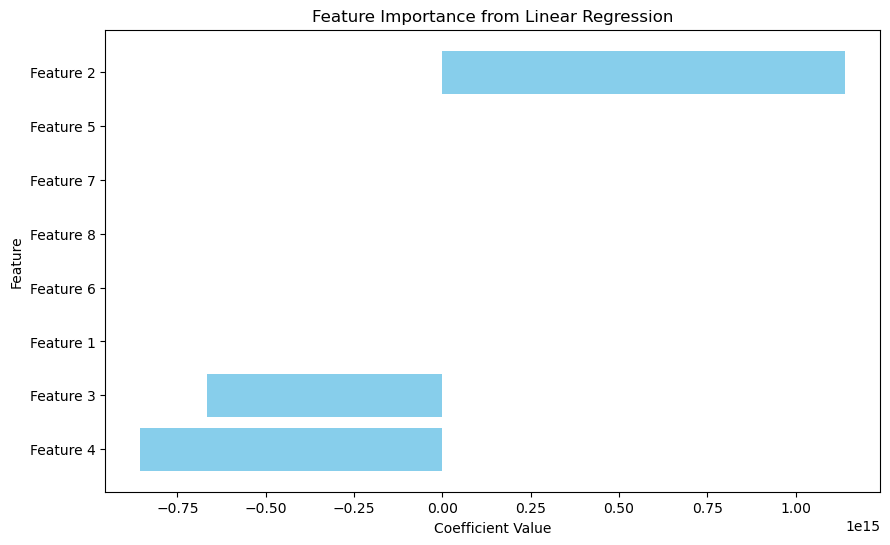

In [48]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance from Linear Regression')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


# Energy Efficiency Improvement Suggestions Based on Feature Importance

## Feature 1: Relative Compactness (Negative Impact)

- Large negative coefficient (-2.549774e+01) indicates that more compact buildings significantly reduce heating load.
- Suggestion: Design compact structures to minimize exposed surface area and maximize energy efficiency.

##  Feature 2: Surface Area (Positive Impact)
- Large positive coefficient (1.139458e+15) indicates that increasing surface area dramatically increases the heating load.
- Suggestion: Optimize the surface area to reduce heat loss. Avoid designs with unnecessarily large exposed areas. Use materials with better insulation   properties.

## Feature 3: Wall Area (Negative Impact)

- Large negative coefficient (-6.646837e+14) shows that increasing wall area with proper insulation reduces heating load.
- Suggestion: Use high R-value insulation materials for walls and ensure minimal thermal bridging.

## Feature 4: Roof Area (Negative Impact)

- Large negative coefficient (-8.545933e+14) suggests that proper insulation and roofing materials can reduce heating load.
- Suggestion: Install energy-efficient roofs with high thermal resistance, such as green roofs or cool roofs.

## Feature 5: Overall Height (Positive Impact)
- Moderate positive coefficient (13.75) indicates that taller buildings require more heating.
- Suggestion: Minimize unnecessary height or invest in vertical insulation materials. Partitioning tall spaces can reduce heating requirements.

## Feature 6: Orientation (Positive Impact)

- Small positive coefficient (0.2749023) suggests heating load depends on building orientation.
- Suggestion: Orient the building to maximize passive solar heating during colder months (e.g., south-facing in the Northern Hemisphere).

## Feature 7: Glazing Area (Positive Impact)

- Positive coefficient (8.204102) suggests that larger glazing areas increase the heating load.
- Suggestion: Use double or triple-glazed windows to reduce heat loss. Optimize the size and placement of windows to balance natural light and heat retention.


## Feature 8: Glazing Area Distribution (Positive Impact)

- Small positive coefficient (0.7895508) implies glazing distribution slightly impacts heating load.
- Suggestion: Distribute glazing areas evenly to avoid cold spots and ensure uniform insulation.